#  Lead Scoring for X Education
    A case study in Logistic Regression

# 1. Import libraries

In [170]:
import pandas as pd, numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


import warnings
warnings.filterwarnings('ignore')

In [171]:
df = pd.read_csv("Leads.csv")
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.00,0,0.00,...,No,Select,Select,02.Medium,02.Medium,15.00,15.00,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.00,674,2.50,...,No,Select,Select,02.Medium,02.Medium,15.00,15.00,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.00,1532,2.00,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.00,20.00,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.00,305,1.00,...,No,Select,Mumbai,02.Medium,01.High,13.00,17.00,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.00,1428,1.00,...,No,Select,Mumbai,02.Medium,01.High,15.00,18.00,No,No,Modified


In [172]:
df_orig = df.copy()

In [173]:
df.shape

(9240, 37)

In [174]:
df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.00,9240.00,9103.00,9240.00,9103.00,5022.00,5022.00
mean,617188.44,0.39,3.45,487.70,2.36,14.31,16.34
std,23406.00,0.49,4.85,548.02,2.16,1.39,1.81
min,579533.00,0.00,0.00,0.00,0.00,7.00,11.00
25%,596484.50,0.00,1.00,12.00,1.00,14.00,15.00
50%,615479.00,0.00,3.00,248.00,2.00,14.00,16.00
75%,637387.25,1.00,5.00,936.00,3.00,15.00,18.00
max,660737.00,1.00,251.00,2272.00,55.00,18.00,20.00


In [175]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [176]:
df['Converted'].value_counts()

0    5679
1    3561
Name: Converted, dtype: int64

In [177]:
df.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

# 2. Data Cleaning
1.Replace the 'Select' value in the categorical values to NaN.

2.Check Percentage of Missing values for all columns

3.Drop columns with a high percentage of missing values

In [178]:
# Converting 'Select' values to NaN.
df = df.replace('Select', np.nan)

In [179]:
percent_missing = df.isnull().sum() * 100 / len(df)
percent_missing.sort_values(ascending=False)

How did you hear about X Education              78.46
Lead Profile                                    74.19
Lead Quality                                    51.59
Asymmetrique Profile Score                      45.65
Asymmetrique Activity Score                     45.65
Asymmetrique Activity Index                     45.65
Asymmetrique Profile Index                      45.65
City                                            39.71
Specialization                                  36.58
Tags                                            36.29
What matters most to you in choosing a course   29.32
What is your current occupation                 29.11
Country                                         26.63
Page Views Per Visit                             1.48
TotalVisits                                      1.48
Last Activity                                    1.11
Lead Source                                      0.39
Receive More Updates About Our Courses           0.00
I agree to pay the amount th

In [180]:
## Dropping columns having null values more than 70%  using threshold parameter
thresh = len(df) * .3
df.dropna(thresh = thresh, axis = 1, inplace = True)

In [181]:
df.shape

(9240, 35)

In [182]:
df.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags', 'Lead Quality',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'City', 'Asymmetrique Activity Index', 'Asymmetrique Profile Index',
       'Asymmetrique Activity Score', 'Asymmetrique Profile Score',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

#### The following are the score columns assigned by the sales team to the dataset after progressing with the leads. These columns can be dropped as they will not add to the model building.
1.Lead Quality
2.Asymmetrique Activity Index
3.Asymmetrique Profile Index
4.Asymmetrique Activity Score
5.Asymmetrique Profile Score

As all the score features have more than 40% Nan values, these can be dropped without affecting our analysis.

In [183]:
thresh = len(df) * .6
df.dropna(thresh = thresh, axis = 1, inplace = True)

In [184]:
df.shape

(9240, 30)

In [185]:
percent_missing = df.isnull().sum() * 100 / len(df)
percent_missing.sort_values(ascending=False)

City                                            39.71
Specialization                                  36.58
Tags                                            36.29
What matters most to you in choosing a course   29.32
What is your current occupation                 29.11
Country                                         26.63
Page Views Per Visit                             1.48
TotalVisits                                      1.48
Last Activity                                    1.11
Lead Source                                      0.39
Through Recommendations                          0.00
Receive More Updates About Our Courses           0.00
Prospect ID                                      0.00
Newspaper                                        0.00
Update me on Supply Chain Content                0.00
Get updates on DM Content                        0.00
I agree to pay the amount through cheque         0.00
A free copy of Mastering The Interview           0.00
Digital Advertisement       

* Drop the columns 'Tag' and 'Last Activity' as the columns are added by Sales team while working on the leads and does not directly contribute to identifying the hot leads.

* Prospect ID and Lead Number are two variables that represent the unique identfier of the Contacted People and as such will not add value to the model. These columns can be dropped. 

In [186]:
df.drop(df[['Tags','Last Activity']], axis=1, inplace = True)

In [187]:
df.drop(df[['Prospect ID', 'Lead Number']], axis=1, inplace=True)

In [188]:
df.shape

(9240, 26)

In [189]:
df.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Country,Specialization,...,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,No,0,0.00,0,0.00,NaN,NaN,...,No,No,No,No,No,No,NaN,No,No,Modified
1,API,Organic Search,No,No,0,5.00,674,2.50,India,NaN,...,No,No,No,No,No,No,NaN,No,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,No,1,2.00,1532,2.00,India,Business Administration,...,No,No,No,No,No,No,Mumbai,No,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,No,0,1.00,305,1.00,India,Media and Advertising,...,No,No,No,No,No,No,Mumbai,No,No,Modified
4,Landing Page Submission,Google,No,No,1,2.00,1428,1.00,India,NaN,...,No,No,No,No,No,No,Mumbai,No,No,Modified


In [190]:
df[['Magazine', 'Receive More Updates About Our Courses', 'Update me on Supply Chain Content', 'Get updates on DM Content', 'I agree to pay the amount through cheque']].head()

,Magazine,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque
0,No,No,No,No,No
1,No,No,No,No,No
2,No,No,No,No,No
3,No,No,No,No,No
4,No,No,No,No,No


In [191]:
# These columns have constant one value so we drop these columns
df.drop(df[['Magazine', 'Receive More Updates About Our Courses', 'Update me on Supply Chain Content', 'Get updates on DM Content', 'I agree to pay the amount through cheque']], axis=1,inplace= True)

In [192]:
df.shape

(9240, 21)

# 3. EDA and Data Visualizations

* Lets convert values 'Yes' and  'No' to 1 and 0

In [193]:
# These columns have boolean values i.e yes and no
df[['Do Not Email','Do Not Call', 'Search', 'Newspaper Article', 'X Education Forums', 'Newspaper', 'Digital Advertisement',
 'Through Recommendations', 'A free copy of Mastering The Interview']].head()

,Do Not Email,Do Not Call,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,A free copy of Mastering The Interview
0,No,No,No,No,No,No,No,No,No
1,No,No,No,No,No,No,No,No,No
2,No,No,No,No,No,No,No,No,Yes
3,No,No,No,No,No,No,No,No,No
4,No,No,No,No,No,No,No,No,No


In [194]:
boolen_col = ['Do Not Email','Do Not Call', 'Search', 'Newspaper Article', 'X Education Forums', 'Newspaper', 'Digital Advertisement',
 'Through Recommendations', 'A free copy of Mastering The Interview']

In [195]:
for each in boolen_col:
    if df[each].value_counts().values.sum() > 0:  # To check if the step was already completed
        df[each] = df[each].map(dict(Yes=1, No=0))

In [196]:
df[boolen_col].head()

,Do Not Email,Do Not Call,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,A free copy of Mastering The Interview
0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0


In [197]:
df.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Country,Specialization,...,What matters most to you in choosing a course,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,City,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,0,0,0,0.00,0,0.00,NaN,NaN,...,Better Career Prospects,0,0,0,0,0,0,NaN,0,Modified
1,API,Organic Search,0,0,0,5.00,674,2.50,India,NaN,...,Better Career Prospects,0,0,0,0,0,0,NaN,0,Email Opened
2,Landing Page Submission,Direct Traffic,0,0,1,2.00,1532,2.00,India,Business Administration,...,Better Career Prospects,0,0,0,0,0,0,Mumbai,1,Email Opened
3,Landing Page Submission,Direct Traffic,0,0,0,1.00,305,1.00,India,Media and Advertising,...,Better Career Prospects,0,0,0,0,0,0,Mumbai,0,Modified
4,Landing Page Submission,Google,0,0,1,2.00,1428,1.00,India,NaN,...,Better Career Prospects,0,0,0,0,0,0,Mumbai,0,Modified


In [198]:
df[boolen_col] = df[boolen_col].astype('int64')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 21 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    9240 non-null   object 
 1   Lead Source                                    9204 non-null   object 
 2   Do Not Email                                   9240 non-null   int64  
 3   Do Not Call                                    9240 non-null   int64  
 4   Converted                                      9240 non-null   int64  
 5   TotalVisits                                    9103 non-null   float64
 6   Total Time Spent on Website                    9240 non-null   int64  
 7   Page Views Per Visit                           9103 non-null   float64
 8   Country                                        6779 non-null   object 
 9   Specialization                                 5860 

In [199]:
df.shape

(9240, 21)

In [200]:
# Identify the value counts of the boolean columns to confirm if they have only one value

for each in boolen_col:
    print (df[each].value_counts(dropna=False))

0    8506
1     734
Name: Do Not Email, dtype: int64
0    9238
1       2
Name: Do Not Call, dtype: int64
0    9226
1      14
Name: Search, dtype: int64
0    9238
1       2
Name: Newspaper Article, dtype: int64
0    9239
1       1
Name: X Education Forums, dtype: int64
0    9239
1       1
Name: Newspaper, dtype: int64
0    9236
1       4
Name: Digital Advertisement, dtype: int64
0    9233
1       7
Name: Through Recommendations, dtype: int64
0    6352
1    2888
Name: A free copy of Mastering The Interview, dtype: int64


Observations:
* Only two fields, 'A free copy of Mastering The Interview' and 'Do Not Email' have values for 1 and 0
* All the other binary features have a very high percent of values as No.
* We can drop these columns as they will not contribute to the analysis.

In [201]:
dropcolumns = [ 'Do Not Call',
                 'Search',
                 'Newspaper Article',
                 'X Education Forums',
                 'Newspaper',
                 'Digital Advertisement',
                 'Through Recommendations']
df.drop(dropcolumns, axis=1, inplace=True)

In [202]:
df.shape

(9240, 14)

In [203]:
df.Converted.dtype

dtype('int64')

###### Outlier Handling for the Numeric Features

In [204]:
df.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Country,Specialization,What is your current occupation,What matters most to you in choosing a course,City,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,0,0,0.00,0,0.00,NaN,NaN,Unemployed,Better Career Prospects,NaN,0,Modified
1,API,Organic Search,0,0,5.00,674,2.50,India,NaN,Unemployed,Better Career Prospects,NaN,0,Email Opened
2,Landing Page Submission,Direct Traffic,0,1,2.00,1532,2.00,India,Business Administration,Student,Better Career Prospects,Mumbai,1,Email Opened
3,Landing Page Submission,Direct Traffic,0,0,1.00,305,1.00,India,Media and Advertising,Unemployed,Better Career Prospects,Mumbai,0,Modified
4,Landing Page Submission,Google,0,1,2.00,1428,1.00,India,NaN,Unemployed,Better Career Prospects,Mumbai,0,Modified


In [205]:
df[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']].head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit
0,0.00,0,0.00
1,5.00,674,2.50
2,2.00,1532,2.00
3,1.00,305,1.00
4,2.00,1428,1.00


In [206]:
df.isnull().sum()

Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Country                                          2461
Specialization                                   3380
What is your current occupation                  2690
What matters most to you in choosing a course    2709
City                                             3669
A free copy of Mastering The Interview              0
Last Notable Activity                               0
dtype: int64

In [207]:
df['TotalVisits'].fillna((df['TotalVisits'].mean()), inplace=True)
df['Page Views Per Visit'].fillna((df['Page Views Per Visit'].mean()), inplace=True)

In [208]:
df[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']].isnull().sum()

TotalVisits                    0
Total Time Spent on Website    0
Page Views Per Visit           0
dtype: int64

<AxesSubplot:xlabel='Converted', ylabel='TotalVisits'>

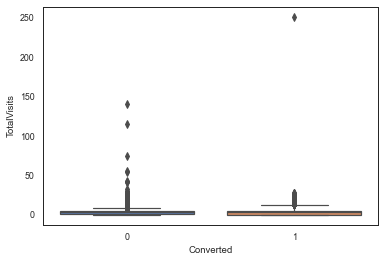

In [209]:
# The Numeric columns are : ['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit'] 
sns.boxplot( data = df , x = 'Converted' , y = 'TotalVisits')


In [210]:
df["TotalVisits"].quantile([0,.25,.5,.75,.90,.95,.99,1])

0.00     0.00
0.25     1.00
0.50     3.00
0.75     5.00
0.90     7.00
0.95    10.00
0.99    17.00
1.00   251.00
Name: TotalVisits, dtype: float64

In [211]:
df=df[~(df["TotalVisits"]>20)]

In [212]:
df["TotalVisits"].quantile([0,.25,.5,.75,.90,.95,.99,.995,.997,1])

0.00    0.00
0.25    1.00
0.50    3.00
0.75    5.00
0.90    7.00
0.95    9.00
0.99   14.00
0.99   17.00
1.00   18.00
1.00   20.00
Name: TotalVisits, dtype: float64

<AxesSubplot:xlabel='Converted', ylabel='Total Time Spent on Website'>

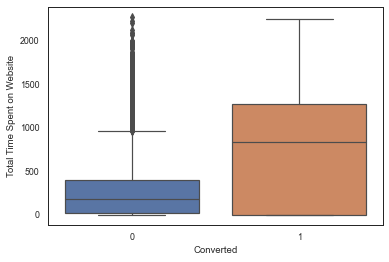

In [213]:
sns.boxplot( data = df , x = 'Converted' , y = 'Total Time Spent on Website')

In [214]:
df["Total Time Spent on Website"].quantile([0,.25,.5,.75,.90,.95,.99,1])

0.00      0.00
0.25     11.00
0.50    248.00
0.75    935.00
0.90   1379.00
0.95   1561.40
0.99   1840.08
1.00   2272.00
Name: Total Time Spent on Website, dtype: float64

In [215]:
df=df[~(df["Total Time Spent on Website"]<60)]

In [216]:
df["Total Time Spent on Website"].quantile([0,0.10,0.20,.25,.5,.75,.90,.95,.99,1])

0.00     60.00
0.10    121.10
0.20    188.20
0.25    226.00
0.50    483.50
0.75   1158.00
0.90   1486.00
0.95   1634.95
0.99   1880.99
1.00   2272.00
Name: Total Time Spent on Website, dtype: float64

<AxesSubplot:xlabel='Converted', ylabel='Page Views Per Visit'>

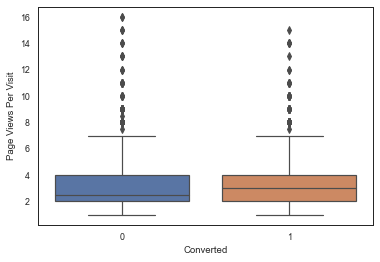

In [217]:
sns.boxplot( data = df , x = 'Converted' , y = 'Page Views Per Visit')

In [218]:
df["Page Views Per Visit"].quantile([0,.25,.5,.75,.90,.95,.99,.995,1])

0.00    1.00
0.25    2.00
0.50    2.67
0.75    4.00
0.90    5.00
0.95    6.00
0.99    9.00
0.99   11.00
1.00   16.00
Name: Page Views Per Visit, dtype: float64

In [219]:
df=df[~(df["Page Views Per Visit"]>15)]

In [220]:
df["Page Views Per Visit"].quantile([0,.25,.5,.75,.90,.95,.99,.995,1])

0.00    1.00
0.25    2.00
0.50    2.67
0.75    4.00
0.90    5.00
0.95    6.00
0.99    9.00
0.99   11.00
1.00   15.00
Name: Page Views Per Visit, dtype: float64

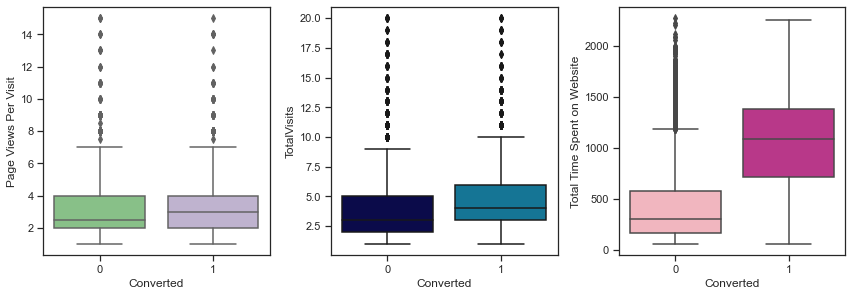

In [221]:
numeric_col = ["Page Views Per Visit","TotalVisits","Total Time Spent on Website"]
sns.set(style='ticks',color_codes=True)
colors = ['Accent', 'ocean' , 'RdPu'] 
plt.figure(figsize = (12, 12))
for i, var in enumerate(numeric_col):
    plt.subplot(3,3,i+1)
    sns.boxplot(x = 'Converted', y = var, data = df, palette=colors[i])
    plt.tight_layout()

After imputing missing values with mean and handling outliers, the mean of the columns for the columns 'TotalVisits' and 'Page Views Per Visit' are almost same for converted and non converted leads.

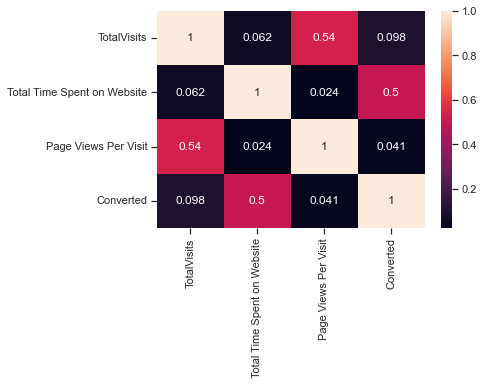

In [222]:
# Heat map of numeric columns with target variable

sns.heatmap(data = df[['TotalVisits','Total Time Spent on Website','Page Views Per Visit','Converted']].corr(),annot=True)
plt.show()

### Analysis for Categorical Variables


In [223]:
df.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Country,Specialization,What is your current occupation,What matters most to you in choosing a course,City,A free copy of Mastering The Interview,Last Notable Activity
1,API,Organic Search,0,0,5.00,674,2.50,India,NaN,Unemployed,Better Career Prospects,NaN,0,Email Opened
2,Landing Page Submission,Direct Traffic,0,1,2.00,1532,2.00,India,Business Administration,Student,Better Career Prospects,Mumbai,1,Email Opened
3,Landing Page Submission,Direct Traffic,0,0,1.00,305,1.00,India,Media and Advertising,Unemployed,Better Career Prospects,Mumbai,0,Modified
4,Landing Page Submission,Google,0,1,2.00,1428,1.00,India,NaN,Unemployed,Better Career Prospects,Mumbai,0,Modified
6,Landing Page Submission,Google,0,1,2.00,1640,2.00,India,Supply Chain Management,Unemployed,Better Career Prospects,Mumbai,0,Modified


In [224]:
# List of categorical columns
categorical_col = ['Lead Origin', 'Lead Source', 'Last Notable Activity', 'Country', 'Specialization', 'What is your current occupation', 'What matters most to you in choosing a course', 'City']

<function matplotlib.pyplot.show(close=None, block=None)>

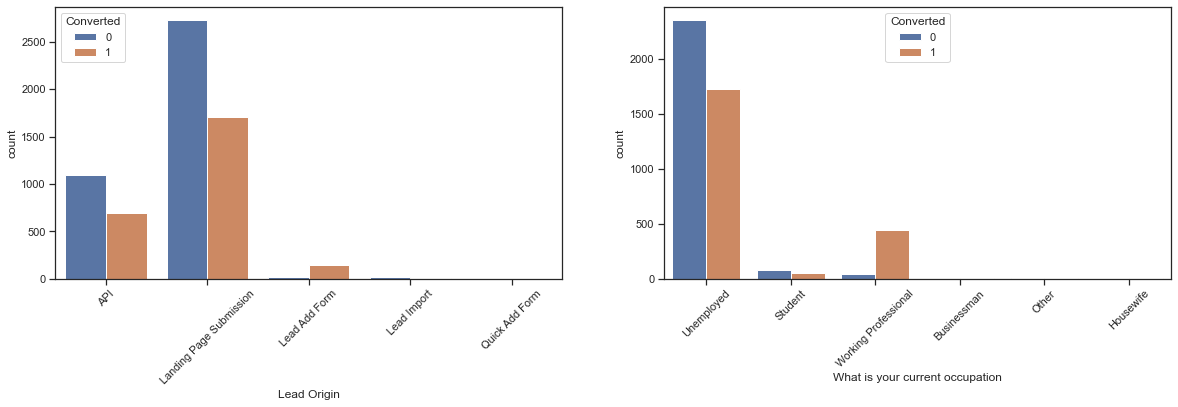

In [225]:
fig ,(ax1,ax2) = plt.subplots(1,2,figsize=(20,5))
lead_origin = sns.countplot(df["Lead Origin"],ax=ax1,hue= 'Converted', data = df)
lead_origin.set_xticklabels(lead_origin.get_xticklabels(),rotation=45)
w_c_o = sns.countplot(df['What is your current occupation'],ax= ax2, hue= 'Converted', data = df)
w_c_o.set_xticklabels(w_c_o.get_xticklabels(), rotation = 45)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

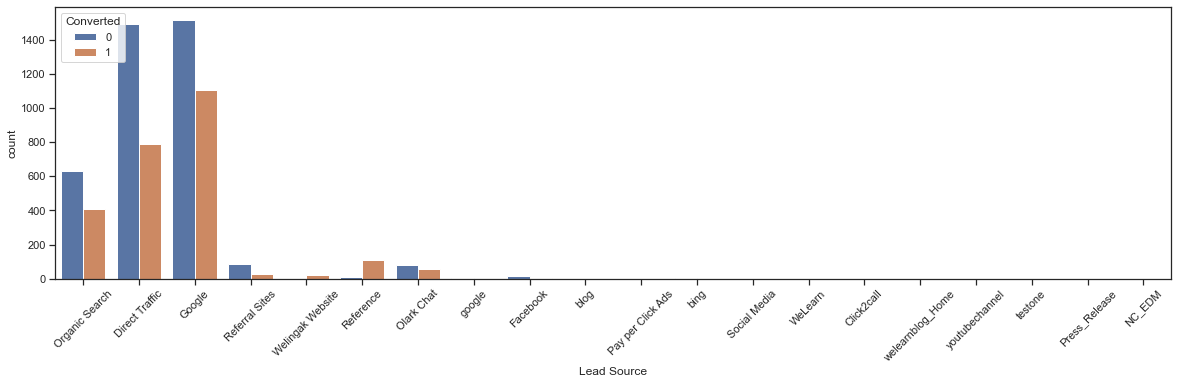

In [226]:
plt.figure(figsize= (20,5))
ls = sns.countplot(df["Lead Source"],hue= 'Converted', data = df)
ls.set_xticklabels(ls.get_xticklabels(),rotation=45)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

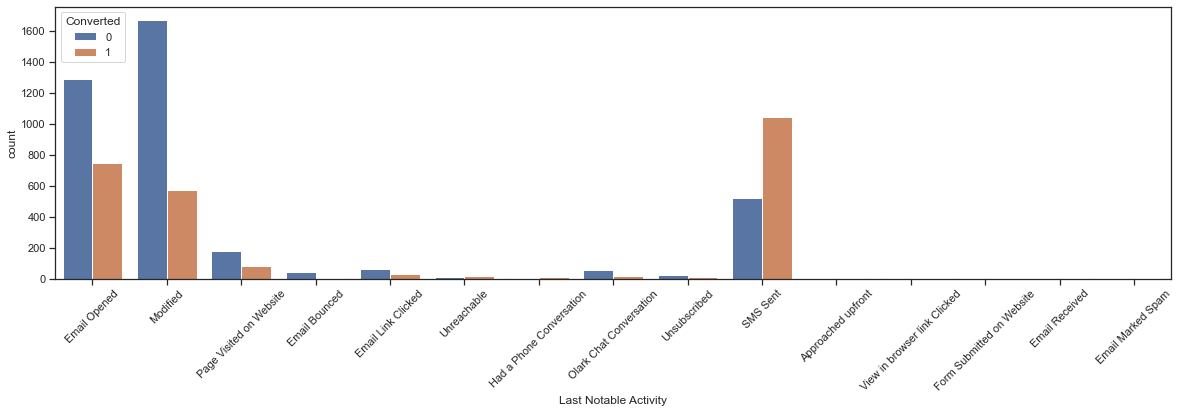

In [227]:
plt.figure(figsize= (20,5))
lna = sns.countplot(df["Last Notable Activity"],hue= 'Converted', data = df)
lna.set_xticklabels(lna.get_xticklabels(),rotation=45)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

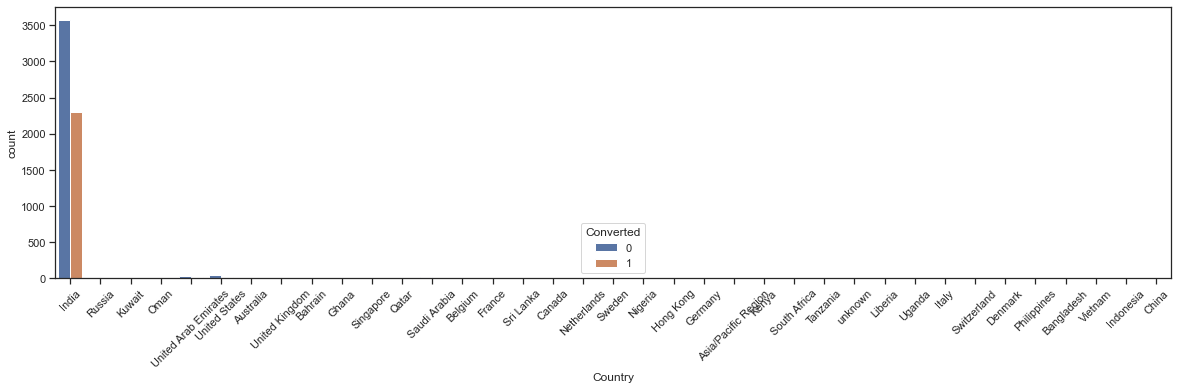

In [228]:
plt.figure(figsize= (20,5))
country = sns.countplot(df["Country"],hue= 'Converted', data = df)
country.set_xticklabels(country.get_xticklabels(),rotation=45)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

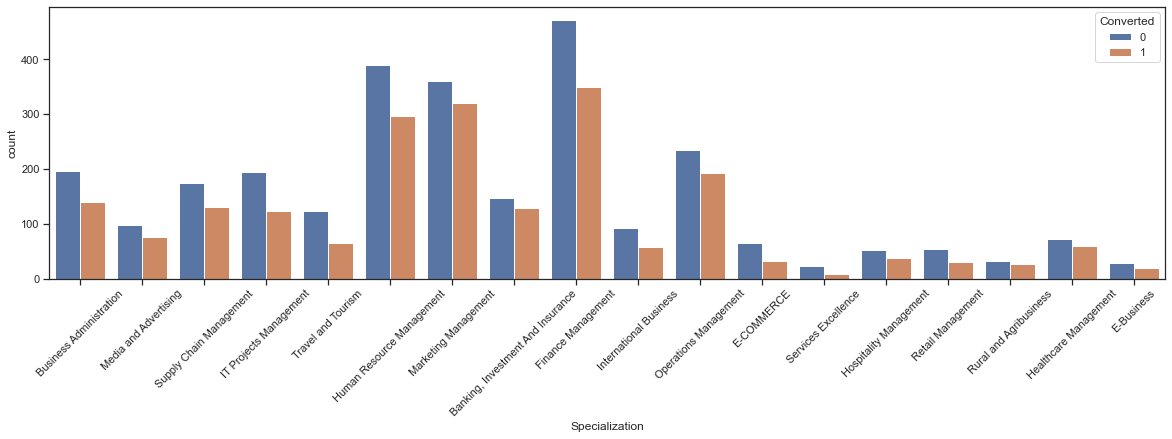

In [229]:
plt.figure(figsize= (20,5))
specialization = sns.countplot(df["Specialization"],hue= 'Converted', data = df)
specialization.set_xticklabels(specialization.get_xticklabels(),rotation=45)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

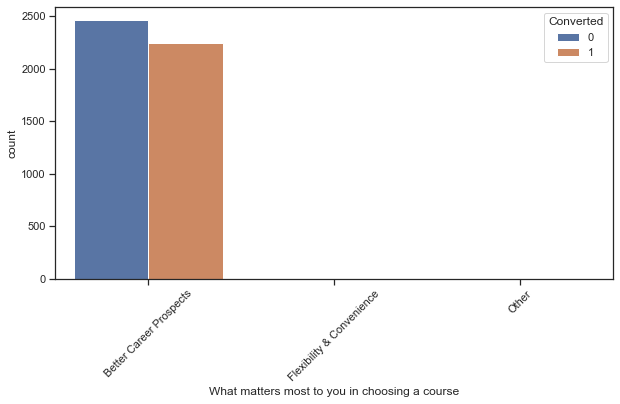

In [230]:
plt.figure(figsize= (10,5))
w_m = sns.countplot(df["What matters most to you in choosing a course"],hue= 'Converted', data = df)
w_m.set_xticklabels(w_m.get_xticklabels(),rotation=45)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

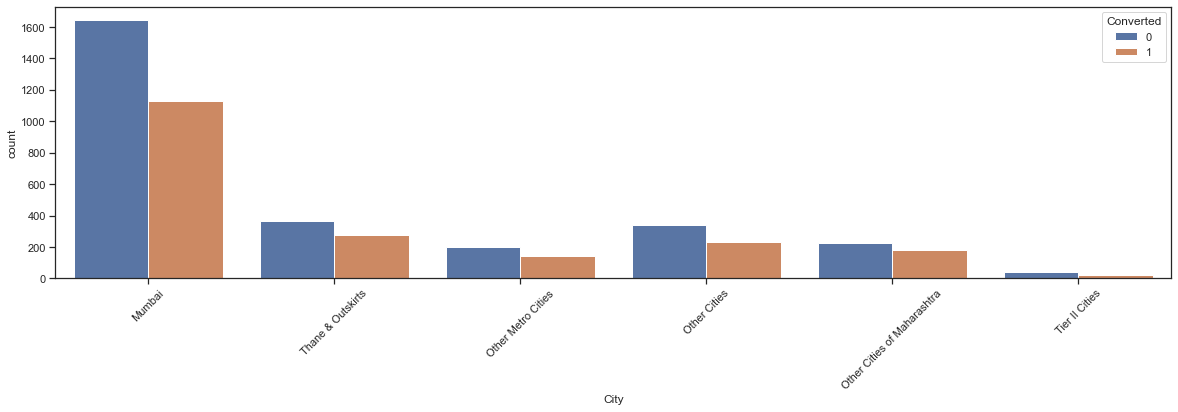

In [231]:
plt.figure(figsize= (20,5))
city = sns.countplot(df["City"],hue= 'Converted', data = df)
city.set_xticklabels(city.get_xticklabels(),rotation=45)
plt.show

* From above analysis we need to Drop the columns 'Country' and 'What matters most to you in choosing a course' as these are highly skewed

In [232]:
df.drop(['Country', 'What matters most to you in choosing a course'], axis = 1, inplace = True)
categorical_col=['Lead Origin', 'Lead Source', 'Last Notable Activity','Specialization', 'What is your current occupation','City']

In [233]:
df.shape

(6400, 12)

In [234]:
df.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Specialization,What is your current occupation,City,A free copy of Mastering The Interview,Last Notable Activity
1,API,Organic Search,0,0,5.00,674,2.50,NaN,Unemployed,NaN,0,Email Opened
2,Landing Page Submission,Direct Traffic,0,1,2.00,1532,2.00,Business Administration,Student,Mumbai,1,Email Opened
3,Landing Page Submission,Direct Traffic,0,0,1.00,305,1.00,Media and Advertising,Unemployed,Mumbai,0,Modified
4,Landing Page Submission,Google,0,1,2.00,1428,1.00,NaN,Unemployed,Mumbai,0,Modified
6,Landing Page Submission,Google,0,1,2.00,1640,2.00,Supply Chain Management,Unemployed,Mumbai,0,Modified


In [235]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6400 entries, 1 to 9239
Data columns (total 12 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             6400 non-null   object 
 1   Lead Source                             6394 non-null   object 
 2   Do Not Email                            6400 non-null   int64  
 3   Converted                               6400 non-null   int64  
 4   TotalVisits                             6400 non-null   float64
 5   Total Time Spent on Website             6400 non-null   int64  
 6   Page Views Per Visit                    6400 non-null   float64
 7   Specialization                          4904 non-null   object 
 8   What is your current occupation         4719 non-null   object 
 9   City                                    4805 non-null   object 
 10  A free copy of Mastering The Interview  6400 non-null   int6

In [236]:
df['Lead Source'].value_counts()

Google               2620
Direct Traffic       2282
Organic Search       1042
Olark Chat            141
Reference             124
Referral Sites        115
Welingak Website       23
Facebook               23
bing                    6
google                  5
Press_Release           2
Social Media            2
Click2call              2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: Lead Source, dtype: int64

In [237]:
df['Lead Source'] = df['Lead Source'].replace(['google'], 'Google')
df['Lead Source'].value_counts()

Google               2625
Direct Traffic       2282
Organic Search       1042
Olark Chat            141
Reference             124
Referral Sites        115
Welingak Website       23
Facebook               23
bing                    6
Press_Release           2
Social Media            2
Click2call              2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: Lead Source, dtype: int64

In [238]:
# Replace all the NaN values for city by Mumbai
df['City'] = df['City'].replace(np.nan, 'Mumbai')

In [239]:
# Since there are so many categories in the categorical features with less than 2% counts each, we can combine all those 
# categories into one category called 'Others'

for each in categorical_col:
    replace_variable = []
    categories = df[each].value_counts()
    list1 = df[each].value_counts().keys().tolist()
    for i, v in enumerate (categories):
        if v <= 200:  ## Anything less than 200
            replace_variable.append(list1[i])
    df[each] = df[each].replace(replace_variable, 'Others')

In [240]:
df.isnull().sum()

Lead Origin                                  0
Lead Source                                  6
Do Not Email                                 0
Converted                                    0
TotalVisits                                  0
Total Time Spent on Website                  0
Page Views Per Visit                         0
Specialization                            1496
What is your current occupation           1681
City                                         0
A free copy of Mastering The Interview       0
Last Notable Activity                        0
dtype: int64

In [241]:
nan_col = ['Specialization', 'What is your current occupation', 'Lead Source']
for i in nan_col:
    df[i].replace(np.nan,"Missing", inplace = True)

In [242]:
df.Specialization.value_counts()

Missing                              1496
Others                               1056
Finance Management                    821
Human Resource Management             685
Marketing Management                  680
Operations Management                 428
Business Administration               335
IT Projects Management                318
Supply Chain Management               304
Banking, Investment And Insurance     277
Name: Specialization, dtype: int64

In [243]:
df.isnull().sum()

Lead Origin                               0
Lead Source                               0
Do Not Email                              0
Converted                                 0
TotalVisits                               0
Total Time Spent on Website               0
Page Views Per Visit                      0
Specialization                            0
What is your current occupation           0
City                                      0
A free copy of Mastering The Interview    0
Last Notable Activity                     0
dtype: int64

In [244]:
# Visualize the Categorical variables after handling missing values and bucketing

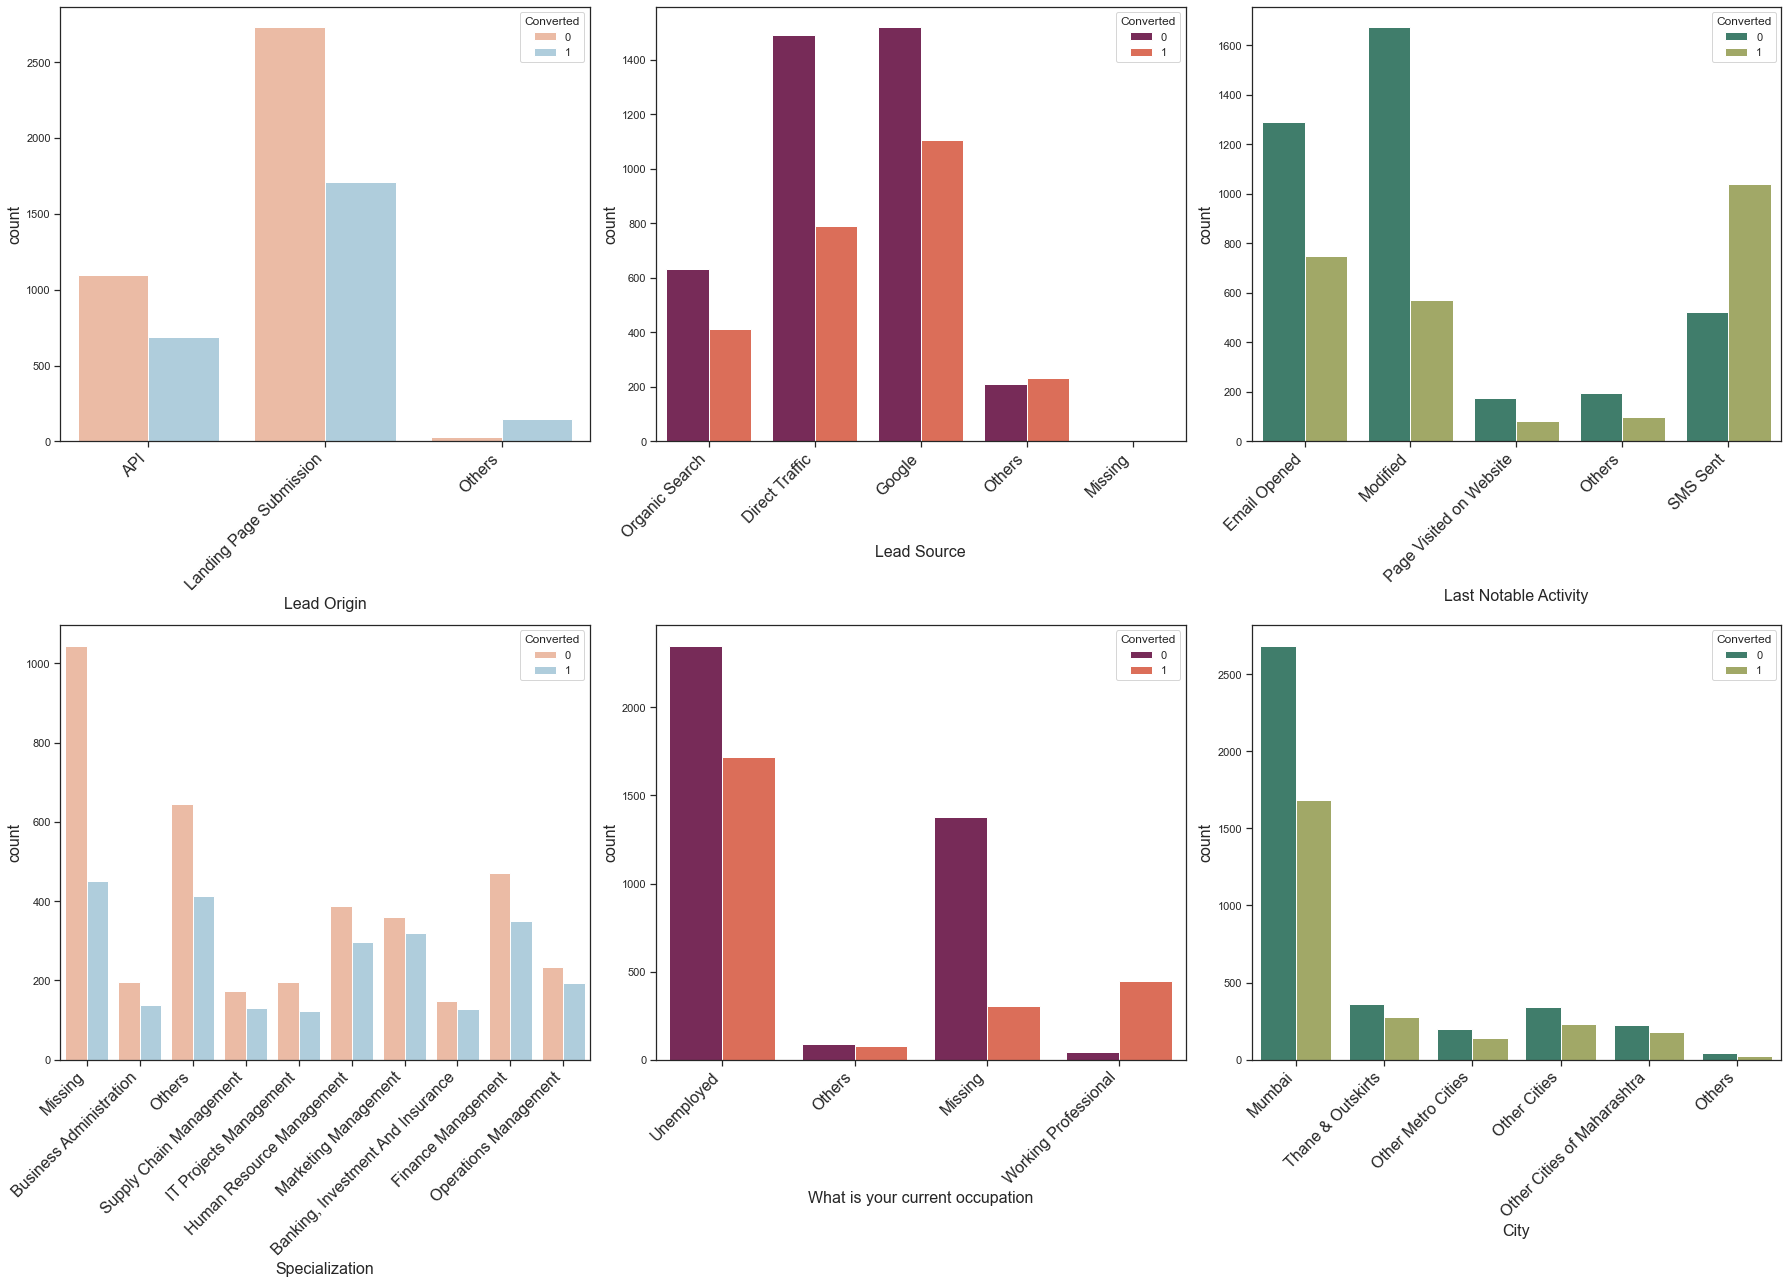

In [245]:
# Count plot for the categorical variables
sns.set(style='ticks',color_codes=True)
plt.figure(figsize = (25, 18))
colors = [ 'RdBu', 'rocket' , 'gist_earth'] * 2
for i, x_var in enumerate(categorical_col):
    plt.subplot(2, 3, i+1)
    chart = sns.countplot(x = x_var, hue = 'Converted', data = df, palette = colors[i])
    chart.set_xticklabels(chart.get_xticklabels(), fontsize=16, rotation=45, ha='right')
    plt.xlabel(x_var, fontsize=16)
    plt.ylabel('count', fontsize=16)
    plt.tight_layout()

There are no missing values and we can proceed with the model building

# 4. Model Building

###### Create Dummy Variables

In [246]:
categorical_col

['Lead Origin',
 'Lead Source',
 'Last Notable Activity',
 'Specialization',
 'What is your current occupation',
 'City']

In [247]:
# For all the categorical features, dummy variables need to be created.
for each in categorical_col:
    dummy = pd.get_dummies(df[each], drop_first=False, prefix=each)
    df = pd.concat([df,dummy],1)
    

In [248]:
df.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Specialization,What is your current occupation,City,...,What is your current occupation_Missing,What is your current occupation_Others,What is your current occupation_Unemployed,What is your current occupation_Working Professional,City_Mumbai,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Others,City_Thane & Outskirts
1,API,Organic Search,0,0,5.00,674,2.50,Missing,Unemployed,Mumbai,...,0,0,1,0,1,0,0,0,0,0
2,Landing Page Submission,Direct Traffic,0,1,2.00,1532,2.00,Business Administration,Others,Mumbai,...,0,1,0,0,1,0,0,0,0,0
3,Landing Page Submission,Direct Traffic,0,0,1.00,305,1.00,Others,Unemployed,Mumbai,...,0,0,1,0,1,0,0,0,0,0
4,Landing Page Submission,Google,0,1,2.00,1428,1.00,Missing,Unemployed,Mumbai,...,0,0,1,0,1,0,0,0,0,0
6,Landing Page Submission,Google,0,1,2.00,1640,2.00,Supply Chain Management,Unemployed,Mumbai,...,0,0,1,0,1,0,0,0,0,0


In [249]:
df.columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Converted',
       'TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
       'Specialization', 'What is your current occupation', 'City',
       'A free copy of Mastering The Interview', 'Last Notable Activity',
       'Lead Origin_API', 'Lead Origin_Landing Page Submission',
       'Lead Origin_Others', 'Lead Source_Direct Traffic',
       'Lead Source_Google', 'Lead Source_Missing',
       'Lead Source_Organic Search', 'Lead Source_Others',
       'Last Notable Activity_Email Opened', 'Last Notable Activity_Modified',
       'Last Notable Activity_Others',
       'Last Notable Activity_Page Visited on Website',
       'Last Notable Activity_SMS Sent',
       'Specialization_Banking, Investment And Insurance',
       'Specialization_Business Administration',
       'Specialization_Finance Management',
       'Specialization_Human Resource Management',
       'Specialization_IT Projects Management',
       'Specia

In [250]:
# Drop the sepcific dummy columns created after the dummy variables are added for these categorical columns such as dummies for missing variable and others which has less than 2% data
Drop_dummies = ['Lead Origin_Others','City_Others','Lead Source_Missing','Specialization_Missing','What is your current occupation_Missing']

df.drop(Drop_dummies, axis = 1, inplace= True)

In [251]:
df.shape

(6400, 40)

In [252]:
categorical_col

['Lead Origin',
 'Lead Source',
 'Last Notable Activity',
 'Specialization',
 'What is your current occupation',
 'City']

In [253]:
# Drop the original categorical columns since the dummy variables are added for these categorical columns
df.drop(categorical_col, axis = 1, inplace = True)

In [254]:
df.shape

(6400, 34)

### Train-Test Split and Logistic Regression Model Building:

In [255]:
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE

In [256]:
# The target variable in y
y = df['Converted']
y.head()

1    0
2    1
3    0
4    1
6    1
Name: Converted, dtype: int64

In [257]:
# Other variables in X
X=df.drop('Converted', axis=1)
X.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_API,Lead Origin_Landing Page Submission,Lead Source_Direct Traffic,Lead Source_Google,Lead Source_Organic Search,...,Specialization_Others,Specialization_Supply Chain Management,What is your current occupation_Others,What is your current occupation_Unemployed,What is your current occupation_Working Professional,City_Mumbai,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts
1,0,5.00,674,2.50,0,1,0,0,0,1,...,0,0,0,1,0,1,0,0,0,0
2,0,2.00,1532,2.00,1,0,1,1,0,0,...,0,0,1,0,0,1,0,0,0,0
3,0,1.00,305,1.00,0,0,1,1,0,0,...,1,0,0,1,0,1,0,0,0,0
4,0,2.00,1428,1.00,0,0,1,0,1,0,...,0,0,0,1,0,1,0,0,0,0
6,0,2.00,1640,2.00,0,0,1,0,1,0,...,0,1,0,1,0,1,0,0,0,0


#### Splitting data into train and test set

In [258]:
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.7, test_size=0.3, random_state=101)

###  Scaling the Numerical features

In [259]:
numeric_col

['Page Views Per Visit', 'TotalVisits', 'Total Time Spent on Website']

In [260]:
scaler = MinMaxScaler()

X_train[numeric_col] = scaler.fit_transform(X_train[numeric_col])

X_train.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_API,Lead Origin_Landing Page Submission,Lead Source_Direct Traffic,Lead Source_Google,Lead Source_Organic Search,...,Specialization_Others,Specialization_Supply Chain Management,What is your current occupation_Others,What is your current occupation_Unemployed,What is your current occupation_Working Professional,City_Mumbai,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts
5369,1,0.26,0.12,0.14,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,1
7753,0,0.26,0.31,0.04,1,0,1,1,0,0,...,0,0,0,0,1,0,0,1,0,0
5481,0,0.00,0.14,0.00,0,1,0,0,0,1,...,0,0,0,1,0,1,0,0,0,0
6470,0,0.37,0.27,0.50,0,0,1,0,1,0,...,0,0,0,1,0,1,0,0,0,0
384,0,0.11,0.14,0.14,1,0,1,1,0,0,...,0,0,0,1,0,1,0,0,0,0


### Build the Logistic Regression model with RFE feature

In [261]:
logmodel = LogisticRegression()

from sklearn.feature_selection import RFE
rfe = RFE(logmodel, 20)             # running RFE with 20 variables as output
rfe = rfe.fit(X_train, y_train)

In [262]:
cols = X_train.columns[rfe.support_]
cols

Index(['Do Not Email', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'Lead Origin_API',
       'Lead Origin_Landing Page Submission', 'Last Notable Activity_Modified',
       'Last Notable Activity_SMS Sent',
       'Specialization_Banking, Investment And Insurance',
       'Specialization_Business Administration',
       'Specialization_Finance Management',
       'Specialization_Human Resource Management',
       'Specialization_IT Projects Management',
       'Specialization_Marketing Management',
       'Specialization_Operations Management', 'Specialization_Others',
       'Specialization_Supply Chain Management',
       'What is your current occupation_Others',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional'],
      dtype='object')

In [263]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('TotalVisits', True, 1),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', True, 1),
 ('A free copy of Mastering The Interview', False, 10),
 ('Lead Origin_API', True, 1),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Source_Direct Traffic', False, 11),
 ('Lead Source_Google', False, 4),
 ('Lead Source_Organic Search', False, 5),
 ('Lead Source_Others', False, 6),
 ('Last Notable Activity_Email Opened', False, 3),
 ('Last Notable Activity_Modified', True, 1),
 ('Last Notable Activity_Others', False, 8),
 ('Last Notable Activity_Page Visited on Website', False, 2),
 ('Last Notable Activity_SMS Sent', True, 1),
 ('Specialization_Banking, Investment And Insurance', True, 1),
 ('Specialization_Business Administration', True, 1),
 ('Specialization_Finance Management', True, 1),
 ('Specialization_Human Resource Management', True, 1),
 ('Specialization_IT Projects Management', True, 1),
 ('Specialization_Marketing Management', True

In [264]:
# Defining a function to generate the model by passing the model name and the columns used for the model 

def gen_model(model_no, cols):
    X_train_sm = sm.add_constant(X_train[cols])
    model_no = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
    res = model_no.fit()
    print (res.summary())
    return res

In [265]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
def calcVIF(col):
    vif = pd.DataFrame()
    vif['Features'] = X_train[col].columns
    vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif

In [266]:
# 1st iteration
# Generate the first model using the RFE features
logm1 = LogisticRegression()

#Pass the columns to generate the model and print summary
res = gen_model(logm1, cols)

# Check the VIF for the features
calcVIF(cols)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 4480
Model:                            GLM   Df Residuals:                     4459
Model Family:                Binomial   Df Model:                           20
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1927.8
Date:                Mon, 07 Feb 2022   Deviance:                       3855.5
Time:                        16:04:13   Pearson chi2:                 4.52e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

,Features,VIF
5,Lead Origin_Landing Page Submission,11.01
3,Page Views Per Visit,3.44
18,What is your current occupation_Unemployed,3.39
1,TotalVisits,3.36
15,Specialization_Others,3.03
2,Total Time Spent on Website,2.55
10,Specialization_Finance Management,2.54
4,Lead Origin_API,2.40
11,Specialization_Human Resource Management,2.25
13,Specialization_Marketing Management,2.17


In [267]:
# first drop the variable Lead Origin_Landing Page Submission since it has a high VIF.
cols = cols.drop('Lead Origin_Landing Page Submission',1)

In [268]:
# 2nd iteration
logm2 = LogisticRegression()
res = gen_model(logm2, cols)
calcVIF(cols).head()

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 4480
Model:                            GLM   Df Residuals:                     4460
Model Family:                Binomial   Df Model:                           19
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1981.2
Date:                Mon, 07 Feb 2022   Deviance:                       3962.5
Time:                        16:04:14   Pearson chi2:                 4.42e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

,Features,VIF
3,Page Views Per Visit,3.36
1,TotalVisits,3.34
17,What is your current occupation_Unemployed,3.27
2,Total Time Spent on Website,2.54
14,Specialization_Others,1.89


In [269]:
cols = cols.drop('Specialization_Business Administration',1)   # removed column having high VIF

In [270]:
# 3rd iteration
logm3 = LogisticRegression()
res = gen_model(logm3, cols)
calcVIF(cols).head()

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 4480
Model:                            GLM   Df Residuals:                     4461
Model Family:                Binomial   Df Model:                           18
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1981.5
Date:                Mon, 07 Feb 2022   Deviance:                       3963.0
Time:                        16:04:14   Pearson chi2:                 4.43e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

,Features,VIF
3,Page Views Per Visit,3.33
1,TotalVisits,3.29
16,What is your current occupation_Unemployed,3.11
2,Total Time Spent on Website,2.49
13,Specialization_Others,1.71


In [271]:
cols = cols.drop('Specialization_Others',1)

In [272]:
# 4th iteration
logm4 = LogisticRegression()
res = gen_model(logm4, cols)
calcVIF(cols).head()

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 4480
Model:                            GLM   Df Residuals:                     4462
Model Family:                Binomial   Df Model:                           17
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1981.7
Date:                Mon, 07 Feb 2022   Deviance:                       3963.4
Time:                        16:04:14   Pearson chi2:                 4.43e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

,Features,VIF
3,Page Views Per Visit,3.25
1,TotalVisits,3.21
15,What is your current occupation_Unemployed,2.90
2,Total Time Spent on Website,2.43
5,Last Notable Activity_Modified,1.63


In [273]:
cols = cols.drop('Specialization_Finance Management',1)

In [274]:
# 5th iteration
logm5 = LogisticRegression()
res = gen_model(logm5, cols)
calcVIF(cols).head()

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 4480
Model:                            GLM   Df Residuals:                     4463
Model Family:                Binomial   Df Model:                           16
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1982.1
Date:                Mon, 07 Feb 2022   Deviance:                       3964.2
Time:                        16:04:14   Pearson chi2:                 4.42e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

,Features,VIF
3,Page Views Per Visit,3.24
1,TotalVisits,3.19
14,What is your current occupation_Unemployed,2.78
2,Total Time Spent on Website,2.40
5,Last Notable Activity_Modified,1.61


In [275]:
cols = cols.drop('Specialization_IT Projects Management',1)

# 6th iteration
logm6 = LogisticRegression()
res = gen_model(logm6, cols)
calcVIF(cols).head()

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 4480
Model:                            GLM   Df Residuals:                     4464
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1982.8
Date:                Mon, 07 Feb 2022   Deviance:                       3965.7
Time:                        16:04:14   Pearson chi2:                 4.42e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

,Features,VIF
3,Page Views Per Visit,3.23
1,TotalVisits,3.19
13,What is your current occupation_Unemployed,2.75
2,Total Time Spent on Website,2.39
5,Last Notable Activity_Modified,1.61


In [276]:
cols = cols.drop('Specialization_Supply Chain Management',1)

# 7th iteration
logm7 = LogisticRegression()
res = gen_model(logm7, cols)
calcVIF(cols).head()

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 4480
Model:                            GLM   Df Residuals:                     4465
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1983.5
Date:                Mon, 07 Feb 2022   Deviance:                       3967.0
Time:                        16:04:14   Pearson chi2:                 4.42e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

,Features,VIF
3,Page Views Per Visit,3.23
1,TotalVisits,3.18
12,What is your current occupation_Unemployed,2.72
2,Total Time Spent on Website,2.39
5,Last Notable Activity_Modified,1.60


In [277]:
cols = cols.drop('Specialization_Operations Management',1)

# 8th iteration
logm8 = LogisticRegression()
res = gen_model(logm8, cols)
calcVIF(cols).head()

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 4480
Model:                            GLM   Df Residuals:                     4466
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1984.2
Date:                Mon, 07 Feb 2022   Deviance:                       3968.4
Time:                        16:04:15   Pearson chi2:                 4.42e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

,Features,VIF
3,Page Views Per Visit,3.23
1,TotalVisits,3.18
11,What is your current occupation_Unemployed,2.70
2,Total Time Spent on Website,2.38
5,Last Notable Activity_Modified,1.60


In [278]:
cols = cols.drop('Lead Origin_API',1)

# 9th iteration
logm9 = LogisticRegression()
res = gen_model(logm9, cols)
calcVIF(cols).head()

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 4480
Model:                            GLM   Df Residuals:                     4467
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1985.1
Date:                Mon, 07 Feb 2022   Deviance:                       3970.3
Time:                        16:04:15   Pearson chi2:                 4.42e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

,Features,VIF
3,Page Views Per Visit,3.21
1,TotalVisits,3.14
10,What is your current occupation_Unemployed,2.63
2,Total Time Spent on Website,2.35
5,Last Notable Activity_SMS Sent,1.59


In [279]:
cols = cols.drop('Specialization_Human Resource Management',1)

# 10th iteration
logm10 = LogisticRegression()
res = gen_model(logm10, cols)
calcVIF(cols).head()

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 4480
Model:                            GLM   Df Residuals:                     4468
Model Family:                Binomial   Df Model:                           11
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1985.9
Date:                Mon, 07 Feb 2022   Deviance:                       3971.7
Time:                        16:04:15   Pearson chi2:                 4.43e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

,Features,VIF
3,Page Views Per Visit,3.20
1,TotalVisits,3.14
9,What is your current occupation_Unemployed,2.60
2,Total Time Spent on Website,2.35
5,Last Notable Activity_SMS Sent,1.59


In [280]:
cols = cols.drop('Specialization_Banking, Investment And Insurance',1)

# 11th iteration
logm11 = LogisticRegression()
res = gen_model(logm11, cols)
calcVIF(cols).head()

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 4480
Model:                            GLM   Df Residuals:                     4469
Model Family:                Binomial   Df Model:                           10
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1986.8
Date:                Mon, 07 Feb 2022   Deviance:                       3973.7
Time:                        16:04:15   Pearson chi2:                 4.43e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

,Features,VIF
3,Page Views Per Visit,3.19
1,TotalVisits,3.13
8,What is your current occupation_Unemployed,2.60
2,Total Time Spent on Website,2.34
5,Last Notable Activity_SMS Sent,1.58


In [281]:
cols = cols.drop('Specialization_Marketing Management',1)

# 12th iteration
logm12 = LogisticRegression()
res = gen_model(logm12, cols)
calcVIF(cols).head()

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 4480
Model:                            GLM   Df Residuals:                     4470
Model Family:                Binomial   Df Model:                            9
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1989.5
Date:                Mon, 07 Feb 2022   Deviance:                       3979.0
Time:                        16:04:15   Pearson chi2:                 4.42e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

,Features,VIF
3,Page Views Per Visit,3.19
1,TotalVisits,3.13
7,What is your current occupation_Unemployed,2.58
2,Total Time Spent on Website,2.33
5,Last Notable Activity_SMS Sent,1.58


In [282]:
cols = cols.drop('Last Notable Activity_Modified',1)

# 13th iteration
logm13 = LogisticRegression()
res = gen_model(logm13, cols)
calcVIF(cols).head()

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 4480
Model:                            GLM   Df Residuals:                     4471
Model Family:                Binomial   Df Model:                            8
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1992.3
Date:                Mon, 07 Feb 2022   Deviance:                       3984.5
Time:                        16:04:15   Pearson chi2:                 4.41e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

,Features,VIF
3,Page Views Per Visit,3.14
1,TotalVisits,3.13
6,What is your current occupation_Unemployed,2.40
2,Total Time Spent on Website,2.28
4,Last Notable Activity_SMS Sent,1.40


In [283]:
# Getting the predicted values on the train set
X_train_sm = sm.add_constant(X_train[cols])
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

5369   0.02
7753   0.91
5481   0.17
6470   0.63
384    0.18
2938   0.98
3504   0.20
2442   0.19
254    0.29
4202   0.16
dtype: float64

In [284]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_prob':y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID
5369,0,0.02,5369
7753,1,0.91,7753
5481,0,0.17,5481
6470,1,0.63,6470
384,0,0.18,384


In [285]:
y_train_pred_final['Predicted'] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x > 0.5 else 0)

y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted
5369,0,0.02,5369,0
7753,1,0.91,7753,1
5481,0,0.17,5481,0
6470,1,0.63,6470,1
384,0,0.18,384,0


### Evaluation Metrics for the Train dataset

In [286]:
from sklearn.metrics import classification_report

In [287]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix

In [288]:
def get_metrics(actual, predicted):
    confusion = confusion_matrix(actual, predicted)

    # check accuracy
    Accuracy = metrics.accuracy_score(actual, predicted)

    TN = confusion[0,0] # true negatives
    FP = confusion[0,1] # false positives
    FN = confusion[1,0] # false negatives
    TP = confusion[1,1] # true positive 

    # Calculate the different Metrics
    Sensitivity = TP / float(TP+FN) # calculate Sensitivity
    Specificity = TN / float(TN+FP) # calculate specificity
    Precision   = TP / float(TP+FP) # calculate Precision
    Recall      = TN / float(TN+FP) # calculate Recall
    FPR = (FP/ float(TN+FP))        # Calculate False Postive Rate - predicting conversion when customer does not convert
    PPV = (TP / float(TP+FP))       # positive predictive value 
    NPV = (TN / float(TN+ FN))      # Negative predictive value
    
    F1 = 2*(Precision*Recall)/(Precision+Recall)

    # Print the Metrics
    print (f'The Confusion Matrix is \n {confusion}')
    print (f'The Accuracy is    : {round (Accuracy,2)} ({Accuracy})')
    print (f'The Sensitivity is : {round (Sensitivity,2)} ({Sensitivity})')
    print (f'The Specificity is : {round (Specificity,2)} ({Specificity})')
    print (f'The Precision is   : {round (Precision, 2)} ({Precision})')
    print (f'The Recall is      : {round (Recall, 2)} ({Recall})')
    print (f'The f1 score is    : {round (F1, 2)} ({F1})')
    print (f'The False Positive Rate is       : {round (FPR, 2)} ({FPR})')
    print (f'The Positive Predictive Value is : {round (PPV, 2)} ({PPV})')
    print (f'The Negative Predictive Value is : {round (NPV, 2)} ({NPV})')


In [289]:
def plot_confusion_metrics(actual, predicted):
    sns.set_style('white')
    cm = confusion_matrix(actual, predicted)
    plt.clf()
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
    classNames = ['Negative','Positive']
    plt.title('True Converted and Predicted Converted Confusion Matrix', fontsize=14)
    plt.ylabel('True Converted', fontsize=14)
    plt.xlabel('Predicted Converted', fontsize=14)
    tick_marks = np.arange(len(classNames))
    plt.xticks(tick_marks, classNames, fontsize=14)
    plt.yticks(tick_marks, classNames, fontsize=14)
    s = [['TN','FP'], ['FN', 'TP']]
    for i in range(2):
        for j in range(2):
            plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]), fontsize=14, ha='center')
    plt.show()

In [290]:
get_metrics(y_train_pred_final.Converted, y_train_pred_final.Predicted)

The Confusion Matrix is 
 [[2321  375]
 [ 559 1225]]
The Accuracy is    : 0.79 (0.7915178571428572)
The Sensitivity is : 0.69 (0.6866591928251121)
The Specificity is : 0.86 (0.8609050445103857)
The Precision is   : 0.77 (0.765625)
The Recall is      : 0.86 (0.8609050445103857)
The f1 score is    : 0.81 (0.8104743308343547)
The False Positive Rate is       : 0.14 (0.13909495548961423)
The Positive Predictive Value is : 0.77 (0.765625)
The Negative Predictive Value is : 0.81 (0.8059027777777777)


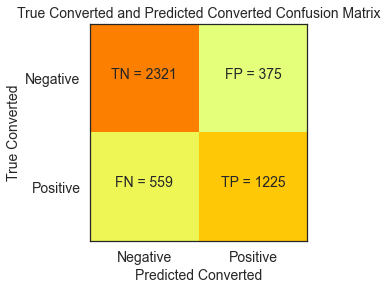

In [291]:
plot_confusion_metrics(y_train_pred_final.Converted, y_train_pred_final.Predicted)

In [292]:
# Derive the Area under the ROC curve for the initial cut-off and predictions
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.show()


In [293]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted,y_train_pred_final.Converted_prob, drop_intermediate = False )

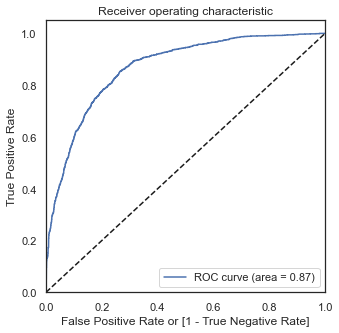

In [294]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

### Getting the Optimal cutoff and final evaluation Metrics for Train Dataset
Calculate the predicted values for the different cut-offs to arrive at the optimal cutoff

In [295]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
5369,0,0.02,5369,0,1,0,0,0,0,0,0,0,0,0
7753,1,0.91,7753,1,1,1,1,1,1,1,1,1,1,1
5481,0,0.17,5481,0,1,1,0,0,0,0,0,0,0,0
6470,1,0.63,6470,1,1,1,1,1,1,1,1,0,0,0
384,0,0.18,384,0,1,1,0,0,0,0,0,0,0,0


In [296]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['probability','accuracy','sensitivity','specificity'])
from sklearn.metrics import confusion_matrix

#     TN = confusion[0,0] # true negatives
#     FP = confusion[0,1] # false positives
#     FN = confusion[1,0] # false negatives
#     TP = confusion[1,1] # true positive 
    
for i in numbers:
    cm1 = metrics.confusion_matrix(y_train_pred_final['Converted'], y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    specificity = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensitivity = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i , accuracy, sensitivity, specificity]
print(cutoff_df)

      probability  accuracy  sensitivity  specificity
0.00         0.00      0.40         1.00         0.00
0.10         0.10      0.57         0.99         0.29
0.20         0.20      0.74         0.91         0.63
0.30         0.30      0.78         0.86         0.72
0.40         0.40      0.79         0.78         0.79
0.50         0.50      0.79         0.69         0.86
0.60         0.60      0.78         0.60         0.90
0.70         0.70      0.75         0.48         0.93
0.80         0.80      0.72         0.36         0.97
0.90         0.90      0.68         0.21         0.99


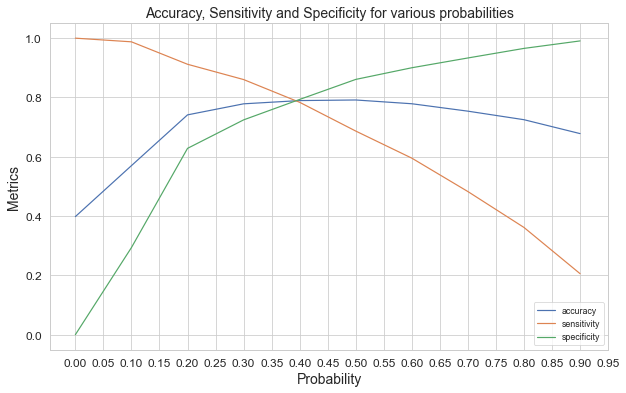

In [297]:
# Let's plot accuracy sensitivity and specificity for various probabilities.

sns.set_style("whitegrid") 
sns.set_context("paper") 
cutoff_df.plot.line(x='probability', y=['accuracy','sensitivity','specificity'], figsize=(10,6))

plt.xticks(np.arange(0, 1, step=0.05), size = 12)
plt.yticks(size = 12)
plt.title('Accuracy, Sensitivity and Specificity for various probabilities', fontsize=14)
plt.xlabel('Probability', fontsize=14)
plt.ylabel('Metrics', fontsize=14)
plt.show()

From the curve above, 0.39 can be taken as the optimum point to take it as a cutoff probability

In [298]:
#### From the curve above, 0.39 is the optimum point to take it as a cutoff probability.

y_train_pred_final['final_Predicted'] = y_train_pred_final.Converted_prob.map( lambda x: 1 if x > 0.39 else 0)
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_Predicted
5369,0,0.02,5369,0,1,0,0,0,0,0,0,0,0,0,0
7753,1,0.91,7753,1,1,1,1,1,1,1,1,1,1,1,1
5481,0,0.17,5481,0,1,1,0,0,0,0,0,0,0,0,0
6470,1,0.63,6470,1,1,1,1,1,1,1,1,0,0,0,1
384,0,0.18,384,0,1,1,0,0,0,0,0,0,0,0,0


In [299]:
# Get all the necessary Metrics for the Training dataset for cut-off 0.39
get_metrics(y_train_pred_final['Converted'], y_train_pred_final['final_Predicted'])

The Confusion Matrix is 
 [[2109  587]
 [ 370 1414]]
The Accuracy is    : 0.79 (0.7863839285714286)
The Sensitivity is : 0.79 (0.7926008968609866)
The Specificity is : 0.78 (0.7822700296735905)
The Precision is   : 0.71 (0.7066466766616691)
The Recall is      : 0.78 (0.7822700296735905)
The f1 score is    : 0.74 (0.7425378657768872)
The False Positive Rate is       : 0.22 (0.2177299703264095)
The Positive Predictive Value is : 0.71 (0.7066466766616691)
The Negative Predictive Value is : 0.85 (0.8507462686567164)


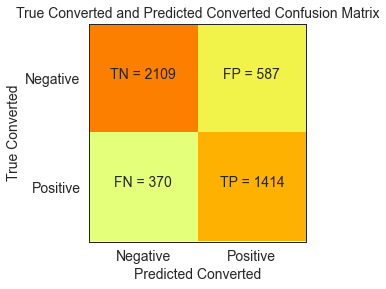

In [300]:
plot_confusion_metrics(y_train_pred_final.Converted, y_train_pred_final.final_Predicted)

In [301]:
print (classification_report(y_train_pred_final['Converted'], y_train_pred_final['final_Predicted']))

              precision    recall  f1-score   support

           0       0.85      0.78      0.82      2696
           1       0.71      0.79      0.75      1784

    accuracy                           0.79      4480
   macro avg       0.78      0.79      0.78      4480
weighted avg       0.79      0.79      0.79      4480



Assign a Lead Score to the Training dataset based on the Conversion probability of the final_Predictions

In [302]:
y_train_pred_final['Lead_Score'] = y_train_pred_final.Converted_prob.map( lambda x: round(x*100))

y_train_pred_final[['Converted','Converted_prob','Prospect ID','final_Predicted','Lead_Score']].head()

,Converted,Converted_prob,Prospect ID,final_Predicted,Lead_Score
5369,0,0.02,5369,0,2
7753,1,0.91,7753,1,91
5481,0,0.17,5481,0,17
6470,1,0.63,6470,1,63
384,0,0.18,384,0,18


In [303]:
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_Predicted,Lead_Score
5369,0,0.02,5369,0,1,0,0,0,0,0,0,0,0,0,0,2
7753,1,0.91,7753,1,1,1,1,1,1,1,1,1,1,1,1,91
5481,0,0.17,5481,0,1,1,0,0,0,0,0,0,0,0,0,17
6470,1,0.63,6470,1,1,1,1,1,1,1,1,0,0,0,1,63
384,0,0.18,384,0,1,1,0,0,0,0,0,0,0,0,0,18


#### Measuring the Precision Recall Trade-off

In [304]:
from sklearn.metrics import precision_recall_curve

p, r, thresholds = precision_recall_curve(y_train_pred_final['Converted'], y_train_pred_final['Converted_prob'])

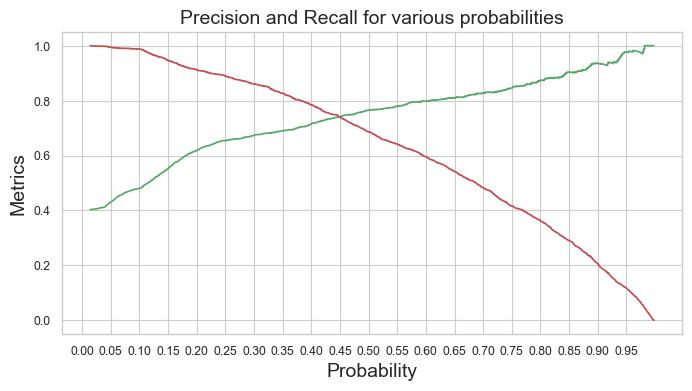

In [305]:
# Plot the Precision / Recall tradeoff chart
sns.set_style("whitegrid") 
sns.set_context("paper") 

plt.figure(figsize=(8, 4), dpi=100, facecolor='w', edgecolor='k', frameon='True')
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.xticks(np.arange(0, 1, step=0.05))
plt.title('Precision and Recall for various probabilities', fontsize=14)
plt.xlabel('Probability', fontsize=14)
plt.ylabel('Metrics', fontsize=14)
plt.show()

## 5. Model Validation
The next step is to validate the model with the test dataset.

In [306]:
X_test.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_API,Lead Origin_Landing Page Submission,Lead Source_Direct Traffic,Lead Source_Google,Lead Source_Organic Search,...,Specialization_Others,Specialization_Supply Chain Management,What is your current occupation_Others,What is your current occupation_Unemployed,What is your current occupation_Working Professional,City_Mumbai,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts
8720,0,13.00,207,3.25,1,0,1,1,0,0,...,0,0,0,1,0,1,0,0,0,0
4544,0,14.00,171,7.00,1,0,1,0,0,1,...,1,0,0,1,0,0,1,0,0,0
3791,0,4.00,245,4.00,0,0,1,0,1,0,...,0,0,0,0,1,0,0,0,0,1
8363,1,3.00,1487,3.00,1,0,1,1,0,0,...,1,0,0,1,0,1,0,0,0,0
5202,0,4.00,219,4.00,0,1,0,0,1,0,...,0,0,0,1,0,1,0,0,0,0


In [307]:
X_test[numeric_col] = scaler.transform(X_test[numeric_col])
X_test.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_API,Lead Origin_Landing Page Submission,Lead Source_Direct Traffic,Lead Source_Google,Lead Source_Organic Search,...,Specialization_Others,Specialization_Supply Chain Management,What is your current occupation_Others,What is your current occupation_Unemployed,What is your current occupation_Working Professional,City_Mumbai,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts
8720,0,0.63,0.07,0.16,1,0,1,1,0,0,...,0,0,0,1,0,1,0,0,0,0
4544,0,0.68,0.05,0.43,1,0,1,0,0,1,...,1,0,0,1,0,0,1,0,0,0
3791,0,0.16,0.08,0.21,0,0,1,0,1,0,...,0,0,0,0,1,0,0,0,0,1
8363,1,0.11,0.65,0.14,1,0,1,1,0,0,...,1,0,0,1,0,1,0,0,0,0
5202,0,0.16,0.07,0.21,0,1,0,0,1,0,...,0,0,0,1,0,1,0,0,0,0


In [308]:
X_test.shape

(1920, 33)

In [309]:
cols

Index(['Do Not Email', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'Last Notable Activity_SMS Sent',
       'What is your current occupation_Others',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional'],
      dtype='object')

In [310]:
# Making Predictions on the X_test dataset

X_test = X_test[cols]
X_test_sm = sm.add_constant(X_test)
X_test.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Notable Activity_SMS Sent,What is your current occupation_Others,What is your current occupation_Unemployed,What is your current occupation_Working Professional
8720,0,0.63,0.07,0.16,0,0,1,0
4544,0,0.68,0.05,0.43,0,0,1,0
3791,0,0.16,0.08,0.21,0,0,0,1
8363,1,0.11,0.65,0.14,1,0,1,0
5202,0,0.16,0.07,0.21,0,0,1,0


In [311]:
y_test_pred = res.predict(X_test_sm)
y_test_pred[:5]

8720   0.27
4544   0.21
3791   0.72
8363   0.67
5202   0.14
dtype: float64

In [312]:
# Create a Dataset with the Prospect ID and the conversion probability for the test datase

# Converting y_pred to a dataframe from an array
y_test_pred_df = pd.DataFrame(y_test_pred)

# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

# Putting CustID to index
y_test_pred_df['Prospect ID'] = y_test_df.index

# Removing index for both dataframes to append them side by side 
y_test_pred_df.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

# Appending y_test_df and y_testest_pred_1
y_test_pred_final = pd.concat([y_test_df, y_test_pred_df],axis=1)

# Renaming the column 
y_test_pred_final= y_test_pred_final.rename(columns={ 0 : 'Converted_prob'})
y_test_pred_final.head(10)

,Converted,Converted_prob,Prospect ID
0,0,0.27,8720
1,0,0.21,4544
2,0,0.72,3791
3,0,0.67,8363
4,0,0.14,5202
5,0,0.14,7179
6,1,0.73,3829
7,0,0.08,3115
8,0,0.04,2234
9,1,0.99,5453


In [313]:
# Generate the Lead Score for the test dataset based on the predicted probability from the model
# Rearranging the columns
y_test_pred_final = y_test_pred_final[['Prospect ID','Converted','Converted_prob']]
y_test_pred_final['Lead_Score'] = y_test_pred_final.Converted_prob.map( lambda x: round(x*100))
y_test_pred_final.head()

,Prospect ID,Converted,Converted_prob,Lead_Score
0,8720,0,0.27,27
1,4544,0,0.21,21
2,3791,0,0.72,72
3,8363,0,0.67,67
4,5202,0,0.14,14


In [314]:
# Get the final Predicted values using the optimal threshold value
# Predict the final y values based on the threshold of 0.39
y_test_pred_final['final_Predicted'] = y_test_pred_final['Converted_prob'].map(lambda x: 1 if x > 0.39 else 0)

y_test_pred_final.head()

,Prospect ID,Converted,Converted_prob,Lead_Score,final_Predicted
0,8720,0,0.27,27,0
1,4544,0,0.21,21,0
2,3791,0,0.72,72,1
3,8363,0,0.67,67,1
4,5202,0,0.14,14,0


### Final Evaluation Metrics for the Test Dataset

In [315]:
get_metrics(y_test_pred_final['Converted'], y_test_pred_final['final_Predicted'])

The Confusion Matrix is 
 [[937 225]
 [153 605]]
The Accuracy is    : 0.8 (0.803125)
The Sensitivity is : 0.8 (0.7981530343007915)
The Specificity is : 0.81 (0.806368330464716)
The Precision is   : 0.73 (0.7289156626506024)
The Recall is      : 0.81 (0.806368330464716)
The f1 score is    : 0.77 (0.7656883137932898)
The False Positive Rate is       : 0.19 (0.193631669535284)
The Positive Predictive Value is : 0.73 (0.7289156626506024)
The Negative Predictive Value is : 0.86 (0.8596330275229358)


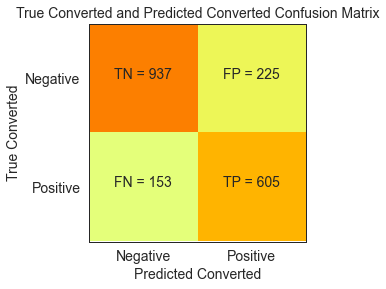

In [316]:
# Plot Confusion metrics for final predicted for test data

plot_confusion_metrics(y_test_pred_final.Converted, y_test_pred_final.final_Predicted)


In [317]:
# Print the classification report for the Test Dataset
print (classification_report(y_test_pred_final['Converted'], y_test_pred_final['final_Predicted']))

              precision    recall  f1-score   support

           0       0.86      0.81      0.83      1162
           1       0.73      0.80      0.76       758

    accuracy                           0.80      1920
   macro avg       0.79      0.80      0.80      1920
weighted avg       0.81      0.80      0.80      1920



## Assigning the Lead score for each Prospect ID from the original data
The final step is to merge the datasets from Train and Test datasets with the predicted Lead Score and attach the Lead score to the original dataset.

In [318]:
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_Predicted,Lead_Score
5369,0,0.02,5369,0,1,0,0,0,0,0,0,0,0,0,0,2
7753,1,0.91,7753,1,1,1,1,1,1,1,1,1,1,1,1,91
5481,0,0.17,5481,0,1,1,0,0,0,0,0,0,0,0,0,17
6470,1,0.63,6470,1,1,1,1,1,1,1,1,0,0,0,1,63
384,0,0.18,384,0,1,1,0,0,0,0,0,0,0,0,0,18


In [319]:
# Create Dataset with y_train Prospect ID and Lead score
y_train_score = y_train_pred_final[['Prospect ID','Lead_Score']]

# Create Dataset with y_test Prospect ID and Lead score
y_test_score = y_test_pred_final[['Prospect ID','Lead_Score']]

# Concatenate the y_train scores and the y_test scores
df_score = pd.concat([y_train_score, y_test_score], ignore_index=True)

# Set the index of the final score dataset as the Prospect ID to concatenate the score dataset to the original data
df_score.set_index('Prospect ID', inplace=True)

# Inner Join the Original Leads dataset with the scores dataset. This will add a new column 'Lead_Score' to the 
# Original dataset. 
df_orig = df_orig.join(df_score['Lead_Score'])

df_orig.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity,Lead_Score
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.00,0,0.00,...,Select,Select,02.Medium,02.Medium,15.00,15.00,No,No,Modified,NaN
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.00,674,2.50,...,Select,Select,02.Medium,02.Medium,15.00,15.00,No,No,Email Opened,34.00
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.00,1532,2.00,...,Potential Lead,Mumbai,02.Medium,01.High,14.00,20.00,No,Yes,Email Opened,81.00
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.00,305,1.00,...,Select,Mumbai,02.Medium,01.High,13.00,17.00,No,No,Modified,16.00
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.00,1428,1.00,...,Select,Mumbai,02.Medium,01.High,15.00,18.00,No,No,Modified,68.00


### Determining Feature Importance

In [320]:
# Selecting the coefficients of the selected features from our final model excluding the intercept
pd.options.display.float_format = '{:.2f}'.format
model_params = res.params[1:]
model_params

Do Not Email                                           -1.50
TotalVisits                                             1.66
Total Time Spent on Website                             4.56
Page Views Per Visit                                   -1.15
Last Notable Activity_SMS Sent                          1.44
What is your current occupation_Others                  1.59
What is your current occupation_Unemployed              1.04
What is your current occupation_Working Professional    3.74
dtype: float64

In [321]:
# Getting a relative coeffient value for all the features wrt the feature with the highest coefficient
feature_importance = model_params
feature_importance = 100.0 * (feature_importance / feature_importance.max())
feature_importance

Do Not Email                                           -32.95
TotalVisits                                             36.43
Total Time Spent on Website                            100.00
Page Views Per Visit                                   -25.22
Last Notable Activity_SMS Sent                          31.61
What is your current occupation_Others                  34.92
What is your current occupation_Unemployed              22.73
What is your current occupation_Working Professional    81.99
dtype: float64

In [322]:
# Sort the feature variables based on their relative coefficient values

sorted_idx = np.argsort(feature_importance,kind='quicksort',order='list of str')
sorted_idx

Do Not Email                                            0
TotalVisits                                             3
Total Time Spent on Website                             6
Page Views Per Visit                                    4
Last Notable Activity_SMS Sent                          5
What is your current occupation_Others                  1
What is your current occupation_Unemployed              7
What is your current occupation_Working Professional    2
dtype: int64

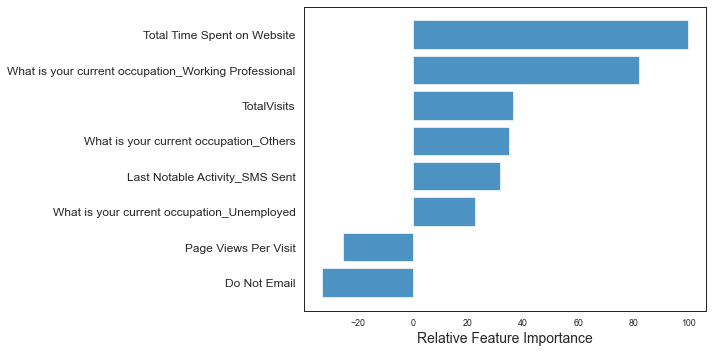

In [323]:
# Plot to show the realtive Importance of each feature in the model 
pos = np.arange(sorted_idx.shape[0]) + .5

fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(1, 1, 1)
ax.barh(pos, feature_importance[sorted_idx], align='center', color = 'tab:blue',alpha=0.8)
ax.set_yticks(pos)
ax.set_yticklabels(np.array(X_train[cols].columns)[sorted_idx], fontsize=12)
ax.set_xlabel('Relative Feature Importance', fontsize=14)

plt.tight_layout()   
plt.show()

## Final Observations and Recommendations

The Final Evaluation Metrics for the train Dataset:
* The Accuracy is : 0.89
* The Sensitivity is : 0.69
* The Specificity is : 0.86
* The Precision is : 0.77
* The Recall is : 0.86
* The f1 score is : 0.81


The Final Evaluation Metrics for the test Dataset:
* The Accuracy is : 0.80
* The Sensitivity is : 0.79
* The Specificity is : 0.81
* The Precision is : 0.73
* The Recall is : 0.81
* The f1 score is : 0.77

### X-Education has a better chance of converting a potential lead when:
* The total time spent on the Website is high: Leads who have spent more time on the website have converted



* Current Occupation is specified: Leads who are working professionals have high chances of getting converted. 



* People who were looking for better prospects like Unemployed, students, Housewives and Business professionals were also good prospects to focus on.



* Number of Total Visits were high Leads who have made a greater number of visits have higher chances of getting converted.



* When the last activity was SMS sent Members who have sent an SMS for enquiry have a higher chance of getting converted.

